<a href="https://colab.research.google.com/github/nafis-git/data_science_path/blob/main/notebooks/date_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating date objects


```
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992,8,24)
```
Weekdays in Python:  
0 = Monday  
1 = Tuesday  
2 = Wednesday  
...  
6 = Sunday


In [ ]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


### Math with dates
just like numbers we can do subtraction and summation with dates provided that they are date object
### timedelta
import timedelta from datetime

In [ ]:
# Import date
from datetime import date
# Create our dates
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
l = [d1, d2]
print(d2-d1)


29 days, 0:00:00


In [ ]:
from datetime import timedelta
td = timedelta(days = 29)
print(d1+td)

2017-12-04


In [ ]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


In [ ]:
dates = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/florida_hurricane_dates.pkl')

In [ ]:
dates[:2]

[datetime.date(1988, 8, 4), datetime.date(1990, 10, 12)]

In [ ]:
#Using florida_hurricane_dates, let's see how hurricanes in Florida were distributed across months throughout the year.
month_count = dict(zip(np.arange(1,13), [0]*12))
month_count

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [ ]:
for d in dates:
  hurrican_month = d.month
  month_count[hurrican_month] += 1

<BarContainer object of 12 artists>

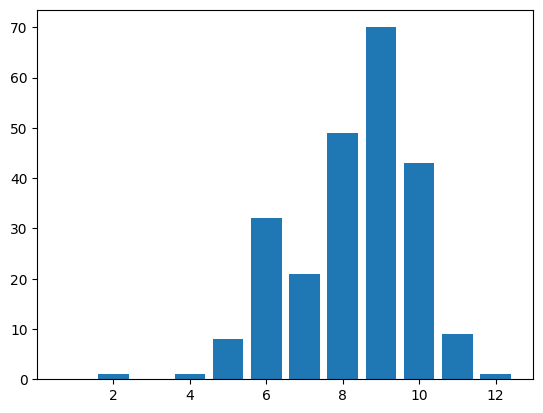

In [ ]:
plt.bar(month_count.keys(), month_count.values())

## date object
>date formatting  
ISO 8601 format (YYYY-MM-DD) it is default format of date object   
- ISO 8601 dates can be sort correctly

>### other formats:
strftime()   
`dateobject.strftiem(format= 'desired format)`

In [ ]:
from datetime import date
d = date(2003,3,12)
d


datetime.date(2003, 3, 12)

In [ ]:
# extract in iso 8601 format as string
print([d.isoformat()])

['2003-03-12']


In [ ]:
d.strftime('"%Y')

'"2003'

In [ ]:
d.strftime("Year is %Y")

'Year is 2003'

In [ ]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

1992-08


In [ ]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'MONTH (YYYY)'
andrew.strftime('%B (%Y)')

'August (1992)'

In [ ]:
#Print andrew in the format 'YYYY-DDD' (where DDD is the day of the year) using %j.
andrew.strftime('%Y-%j')

'1992-239'

### datetime object
from datetime import datetime

datetime(year, month, day, hour, minutes, seconds, miliseceonds)

### using replace method
dt.replace( the changes you wish)

In [ ]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [ ]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017,12,31,15,19,13)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-12-31T15:19:13


In [ ]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year = 1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


In [ ]:
onebike_datetimes = pd.read_csv('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/capital-onebike.csv',
            parse_dates = ['Start date', 'End date'] )

In [ ]:
onebike_datetimes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [ ]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

# Loop over all trips
for strat_date in onebike_datetimes['Start date'].dt.hour:
  # Check to see if the trip starts before noon
  if strat_date< 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1

print(trip_counts)

{'AM': 94, 'PM': 196}


In [ ]:
## strftime
# create datetime
from datetime import datetime
dt = datetime(2015,12,3,12,12,34)
print(dt.strftime("%Y-%m%d"))

2015-1203


In [ ]:
print(dt.strftime("%Y-%m-%d %H:%M%S"))

2015-12-03 12:1234


In [ ]:
 # using isoformat ISO 8601
 print(dt.isoformat())

2015-12-03T12:12:34


In [ ]:
# parsing datetime from string
datetime.strptime('30-12-1980 14:18:13', "%d-%m-%Y %H:%M:%S")

datetime.datetime(1980, 12, 30, 14, 18, 13)

In [ ]:
# Unix timestamp. Many computers store datetime information behind the scenes as the number of seconds since January 1, 1970

ts = 1514322523.90
datetime.fromtimestamp(ts)

datetime.datetime(2017, 12, 26, 21, 8, 43, 900000)

In [ ]:
#duration: the elapsed time between events.
strat = datetime(2014,12,21, 23,45,47)
end = datetime(2015,4,5, 12,43,50)
duration = end - strat
print(duration)
print(duration.total_seconds())
# the type of the duration is timedelta
type(duration)

104 days, 12:58:03
9032283.0


datetime.timedelta

In [ ]:
### createing time delta
from datetime import timedelta
delta = timedelta(days = 2, seconds= 12)
print(strat + delta)

2014-12-23 23:45:59


In [ ]:
# create a column for elapse of time between end and start date
onebike_datetimes['duration'] = [ (end- start).total_seconds() for (start, end) in zip(onebike_datetimes['Start date'],onebike_datetimes['End date'])]

In [ ]:
onebike_datetimes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,duration
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,181.0
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,7622.0
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,343.0
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,1278.0
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,1277.0


In [ ]:
# what is the average of holding the bieks
onebike_datetimes['duration'].mean() # based on number of seconds

1178.9310344827586

In [ ]:
# find the shortest and longest trip
onebike_datetimes['duration'].min()
# For at least one trip, the bike returned before it left. Why could that be?


-3346.0

In [ ]:
onebike_datetimes.query("duration <0")

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,duration
129,2017-11-05 01:56:50,2017-11-05 01:01:04,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member,-3346.0


It is related to November when hour changes for the purpose of day_light

In [ ]:
onebike_datetimes['duration'].max()

76913.0

# **TIME ZONE**
Because the United Kingdom was the first to standardize its time, everyone in the world sets their clocks relative to the original historical UK standard. This standard time is called UTC. Because all clocks are set relative to UTC, we can compare time around the world. Generally, clocks west of the UK are set earlier than UTC, and clocks east of the UK are set later than UTC.

In [ ]:
# import relevent classes
from datetime import datetime, timedelta, timezone

# US eastern Standard time zone UTC -5
ET = timezone(timedelta (hours = -5))
# Time_zone aware datetime
dt = datetime(2017, 12, 30, 15,9,3 , tzinfo = ET)
print(dt)

2017-12-30 15:09:03-05:00


In [ ]:
# let's create a timezone for india UTC+5:30
IST = timezone(timedelta (hours = 5, minutes = 30))
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


In [ ]:
dt.replace(tzinfo = timezone.utc)

datetime.datetime(2017, 12, 30, 15, 9, 3, tzinfo=datetime.timezone.utc)

In [ ]:
dt.astimezone(timezone.utc)

datetime.datetime(2017, 12, 30, 20, 9, 3, tzinfo=datetime.timezone.utc)

In [ ]:
#Import timezone. Set the tzinfo to UTC, without using timedelta
from datetime import datetime, timedelta, timezone

tz = timezone.utc
## October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo = tz)
dt.isoformat()


'2017-10-01T15:26:26+00:00'

In [ ]:
# Create a timezone for Pacific Standard Time, or UTC-8
ptz = timezone(timedelta(hours = -8))
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo = ptz)
dt.isoformat()

'2017-10-01T15:26:26-08:00'

**Now let's have the time of start and end for the bike**

In [ ]:
# set timezone to  corresponding to UTC-4
ptz = timezone(timedelta(hours = -4))
onebike_datetimes['Start date'] = [ s_date.replace(tzinfo = ptz) for s_date in onebike_datetimes['Start date']]
onebike_datetimes['End date'] = [ e_date.replace(tzinfo = ptz) for e_date in onebike_datetimes['End date']]

In [ ]:
# chekc what is the first 5 rows of start time in UTC
[ s_date.astimezone(timezone.utc).isoformat() for s_date in onebike_datetimes['Start date'].head()]

['2017-10-01T19:23:25+00:00',
 '2017-10-01T19:42:57+00:00',
 '2017-10-02T10:37:10+00:00',
 '2017-10-02T12:56:45+00:00',
 '2017-10-02T22:23:48+00:00']

### **Day light saving time**

In [ ]:
# first lets solve it manualy
t1 = datetime(2017,3,12,1,59,59)
t2 = datetime(2017,3,12,3,0,0)
(t2-t1).total_seconds()

3601.0

In [ ]:
# first we shift both time to utc timezone
EST = timezone(timedelta(hours = -5))
EDT = timezone(timedelta(hours = -4))


In [ ]:
# first lets solve it manualy
t1 = datetime(2017,3,12,1,59,59, tzinfo = EST)
t2 = datetime(2017,3,12,3,0,0 ,tzinfo = EDT)
(t2-t1).total_seconds()

1.0

**above result is due to daylight saving**

In [ ]:
# best way to handle the daylight saiving issue is dateutil library
from dateutil import tz
eastern = tz.gettz('America/New_York')
t1 = datetime(2017,3,12,1,59,59, tzinfo = eastern)
t2 = datetime(2017,3,12,3,0,0, tzinfo = eastern)

In [ ]:
t2-t1

datetime.timedelta(seconds=3601)

Ending daylight saving time

In [ ]:
from dateutil import tz
from datetime import datetime, timedelta, timezone
eastern = tz.gettz('US/Eastern')
# 2017-11-05 01:00:00
first_1am = datetime(2017,11,5,1,0,0, tzinfo = eastern)
# lets check if this time is ambigious
tz.datetime_ambiguous(first_1am)

True

In [ ]:
 # using unfold
 second_1am = datetime(2017,11,5,1,0,0, tzinfo = eastern) # same as the first_1am
 second_1am = tz.enfold(second_1am)

In [ ]:
first_1am - second_1am

datetime.timedelta(0)

In [ ]:
########### it shows nothing , so enfold does not show any extra data and to see the ambiguity we should return the dates to UTC
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)
(second_1am -first_1am).total_seconds()


3600.0

**date time in pandas**

In [1]:
import pandas as pd
rides = pd.read_csv('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/capital-onebike.csv', parse_dates = ['Start date', 'End date'])
# or in case we need to define the format of the datetime we can chnage the datetime column format with pd.to_datetime(column, forma = '%Y=....')
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [2]:
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration_second'] = rides['Duration'].dt.total_seconds()

In [3]:
# resample method  group by time
rides.resample('M', on = 'Start date')['Duration_second'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration_second, dtype: float64

<Axes: xlabel='Start date'>

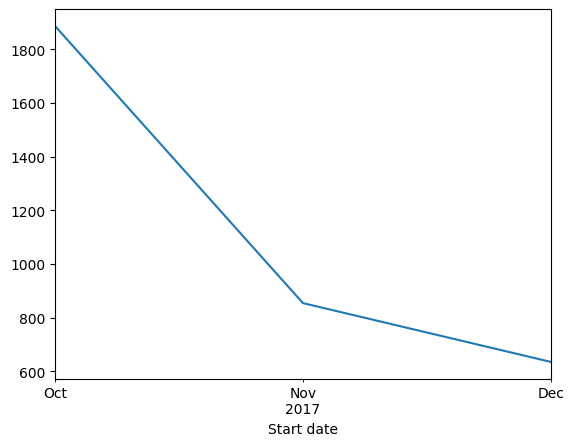

In [4]:
# plot it
rides.resample('M', on = 'Start date')['Duration_second'].mean().plot()

In [5]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print(rides['Duration'].median())



6 rides were joyrides
0 days 00:11:00


In [6]:
# Median of joyrides
print(rides[joyrides]['Duration'].median())

0 days 00:44:02.500000


In [7]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31          0 days 00:27:16
             2017-11-30   0 days 00:19:19.500000
             2017-12-31          0 days 00:14:10
Member       2017-10-31          0 days 00:11:11
             2017-11-30          0 days 00:10:55
             2017-12-31   0 days 00:06:27.500000
Name: Duration, dtype: timedelta64[ns]


It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. Keep in mind that you can also group by more than one column at once.

In [8]:
rides['Duration'].dt.total_seconds().min()

-3346.0

In [9]:
##!!!! it's negative due to daylight saving
## the method in pandas is dt.tz_localize('')
rides['Start date'].head(3)


0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

In [14]:
# size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [15]:
# first ride per group
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration_second
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


In [16]:
rides['Start date'].head(3).dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [13]:
# however, if we change all the colum with this method we will encounter ambigious time

rides['Start date'].dt.tz_localize('America/New_York')

AmbiguousTimeError: Cannot infer dst time from 2017-11-05 01:56:50, try using the 'ambiguous' argument

In [19]:
# to solve this
rides['Start date'] = rides['Start date']\
.dt.tz_localize('America/New_York', ambiguous= 'NaT') # meaning thatsays that if the converter gets confused, it should set the bad result as Not a Time

rides['End date'] = rides['End date']\
.dt.tz_localize('America/New_York', ambiguous= 'NaT') # meaning thatsays that if the converter gets confused, it should set the bad result as Not a Time

In [20]:
# recalculate the duration
rides['Duration'] = rides['End date'] - rides['Start date']

In [21]:
rides['Duration'].dt.total_seconds().min()

116.0

In [22]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


**Pandas also lets you shift rows up or down with the .shift()**:  
This is useful if you want to, for example, line up the end times of each row with the start time of the next one.

In [23]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday             0 days 00:11:24
Monday      0 days 00:15:22.500000
Saturday           0 days 00:10:10
Sunday             0 days 00:10:25
Thursday           0 days 00:10:59
Tuesday            0 days 00:10:44
Wednesday          0 days 00:10:29
Name: Duration, dtype: timedelta64[ns]


In [24]:
#  How much time elapsed between rides?
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64
